In [60]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf

import sys
sys.path.insert(0, '../model_functions')
import plotting as pl
import importlib
# importlib.reload(pl)

<module 'plotting' from '../model_functions/plotting.py'>

In [2]:
data_path = "../../data/cull%i/model_data/" % 1

train_aa_dict = np.load(data_path + 'train_aa_dict.npy')[()]
train_cmap_dict = np.load(data_path + 'train_cmap_dict.npy')[()]
valid_aa_dict = np.load(data_path + 'valid_aa_dict.npy')[()]
valid_cmap_dict = np.load(data_path + 'valid_cmap_dict.npy')[()]
devtest_aa_dict = np.load(data_path + 'devtest_aa_dict.npy')[()]
devtest_cmap_dict = np.load(data_path + 'devtest_cmap_dict.npy')[()]

In [159]:
len(train_aa_dict)

139

# Special Layers

In [155]:
# class OuterProduct(tf.keras.layers.Layer):
#     """
#     Given a layer of size (B, L, N), create 
#     a layer of size (B, L, L, 3N).
#     If we have {v1, ..., vm},
#     for the i, j entry, we have (vi, v((i+j)/2), vj).
#     """

#     def __init__(self):
#         super(OuterProduct, self).__init__()

#     def call(self, incoming):
#         """
#         Create the layer.

#         :param incoming: tensor of size (B, L, N)
#         :type  incoming: tensorflow.python.framework.ops.Tensor
#         :returns: tensor of size (B, L, L, 3N)
#         :rtype:   tensorflow.python.framework.ops.Tensor
#         """

#         L = tf.shape(incoming)[1]
#         # save the indexes of each position
#         v = tf.range(0, L, 1)

#         i, j = tf.meshgrid(v, v)

#         m = tf.cast((i+j)/2, tf.int32)

#         # switch batch dim with L dim to put L at first
#         incoming2 = tf.transpose(incoming, perm=[1, 0, 2])

#         # full matrix i with element in incomming2 indexed i[i][j]
#         out1 = tf.nn.embedding_lookup(incoming2, i)
#         out2 = tf.nn.embedding_lookup(incoming2, j)
#         out3 = tf.nn.embedding_lookup(incoming2, m)

#         # concatanate final feature dim together
#         out = tf.concat([out1, out2, out3], axis=3)
#         # return to original dims
#         output = tf.transpose(
#             out,
#             perm=[2, 0, 1, 3],
#             name="outer_product"
#         )
#         return output

In [133]:
5.5 % 2

1.5

In [150]:
# def residual_conv_block(
#         x,
#         convnet,
#         stride,
#         num_layers,
#         regularizer=None,
#         activation="relu",
#         padding="same"):
#     """
#     Create a residual convolution block, either 
#     in 1 or 2 dimensions.

#     :param x: 
#     :type x:  
#     :param convnet: indicates which type of layer to use
#     :type  convnet: string
#     :param stride: stride
#     :type  stride: int
#     :param num_layers: number of layers for the entire residual network
#     :type  num_layers: int
#     :param regularizer: 
#     :type  regularizer: 
#     :param activation: 
#     :type  activation: str
#     :param padding:
#     :type  padding: str
#     :returns: result of the residual network
#     :rtype:   tensorflow.python.framework.ops.Tensor
#     """

#     size = int(x.shape[-1])
#     y = x

#     if num_layers % 2 != 0:
#         raise ValueError("The number of layers must be even")

#     def one_dim_block(x, i):
#         """
#         Create the duo layer for conv1d.

#         :param x: input
#         :type  x: tensorflow.python.framework.ops.Tensor
#         :param i: position of that duo layer
#         :type  i: int
#         :returns: 
#         :rtype:   tensorflow.python.framework.ops.Tensor
#         """

#         i += 1
#         z = tf.keras.layers.Conv1D(
#             size,
#             stride,
#             activation=activation,
#             padding=padding,
#             kernel_regularizer=regularizer,
#             name=convnet + "_layer{}a".format(i),
#         )(x)
#         z = tf.keras.layers.BatchNormalization(
#             name=convnet + "_batch_norm{}a".format(i),
#         )(z)

#         z = tf.keras.layers.Conv1D(
#             size,
#             stride,
#             activation=activation,
#             padding=padding,
#             kernel_regularizer=regularizer,
#             name=convnet + "_layer{}b".format(i),
#         )(z)
#         z = tf.keras.layers.BatchNormalization(
#             name=convnet + "_batch_norm{}b".format(i),
#         )(z)

#         z = tf.keras.layers.add(
#             [z, x],
#             name=convnet + "_residual_block{}".format(i)
#         )

#         return z

#     def two_dim_block(x, i):
#         """
#         Create the duo layer for conv2d.

#         :param x: input
#         :type  x: tensorflow.python.framework.ops.Tensor
#         :param i: position of that duo layer
#         :type  i: int
#         :returns: 
#         :rtype:   tensorflow.python.framework.ops.Tensor
#         """

#         i += 1
#         z = tf.keras.layers.Conv2D(
#             size,
#             stride,
#             activation=activation,
#             padding=padding,
#             kernel_regularizer=regularizer,
#             name=convnet + "_layer{}a".format(i),
#         )(x)
#         z = tf.keras.layers.BatchNormalization(
#             name=convnet + "_batch_norm{}a".format(i),
#         )(z)

#         z = tf.keras.layers.Conv2D(
#             size,
#             stride,
#             activation=activation,
#             padding=padding,
#             kernel_regularizer=regularizer,
#             name=convnet + "_layer{}b".format(i),
#         )(z)
#         z = tf.keras.layers.BatchNormalization(
#             name=convnet + "_batch_norm{}b".format(i),
#         )(z)

#         z = tf.keras.layers.add(
#             [z, x],
#             name=convnet + "_residual_block{}".format(i)
#         )

#         return z

#     if convnet == "1d_convnet":
#         for i in range(int(num_layers / 2)):
#             y = one_dim_block(y, i)

#         name = "convnet_1d"

#     elif convnet == "2d_convnet":
#         for i in range(int(num_layers / 2)):
#             y = two_dim_block(y, i)
#         name = "convnet_2d"

#     else:
#         raise ValueError("Not an available convnet dimension")

#     return y

In [156]:
from tensorflow.keras import layers

In [73]:
# inception V3 module

def inception_module (x):
    """
    Create the inception V3 module
    
    :param x: Tensor input continuing from the chain
    :type  x: tensorflow.python.framework.ops.Tensor
    
    :return: The concatenated output of the four branches
    :rtype:  tensorflow.python.framework.ops.Tensor
    """
    
    branch_a = layers.Conv2D(
        128,
        1,
        activation='relu',
        strides=2,
        padding="same"
    )(x)

    branch_b = layers.Conv2D(
        128,
        1,
        activation='relu'
    )(x)
    branch_b = layers.Conv2D(
        128,
        3,
        activation='relu',
        strides=2,
        padding="same"
    )(branch_b)

    branch_c = layers.AveragePooling2D(
        3,
        strides=2,
        padding="same"
    )(x)
    branch_c = layers.Conv2D(
        128,
        3,
        activation='relu',
        padding="same"
    )(branch_c)

    branch_d = layers.Conv2D(
        128,
        1,
        activation='relu'
    )(x)
    branch_d = layers.Conv2D(
        128,
        3,
        activation='relu',
        padding="same"
    )(branch_d)
    branch_d = layers.Conv2D(
        128,
        3,
        activation='relu',
        strides=2,
        padding="same"
    )(branch_d)

    output = layers.concatenate(
        [branch_a, branch_b, branch_c, branch_d],
        name="Inception_V3"
    )
    return output

# Generator

In [74]:
import random


# def aa_generator(x, y):
#     """
#     Generator for feeding a single instance of an 
#     input and an output.
#     The generator is reset when all elements are used.

#     :param: input
#     :type:  dict
#     :param: label
#     :type:  dict
#     :returns: a single instance of input and label
#     :rtype:   (numpy array, numpy array)
#     """

#     inputs = x.copy()
#     outputs = y.copy()
#     keys = set(x.keys())

#     while True:
#         try:
#             key = random.sample(keys, 1)[0]
#             keys.remove(key)

#             one_hot_aa = x[key]
#             one_hot_aa = np.reshape(one_hot_aa, (1,) + one_hot_aa.shape)
#             cmap = y[key]
#             cmap = np.reshape(cmap, (1,) + cmap.shape + (1,))
#             yield one_hot_aa, cmap

#         except ValueError:
#             # if out of keys, reinsert back the keys
#             inputs = x.copy()
#             outputs = y.copy()
#             keys = set(x.keys())

# Create Model

What the paper said:
    
    3-state second- ary structure and 3-state solvent accessibility
    added onto to the amino acid 
    
    ReLU activation after each layer.
    In the residual network, their number of features of the 
    next layer is greater than the one below it, so they had to padd
    the previous layer with zeros to allow adding. Not doing this
    Batch normalization before activation layer 
    (but did not say whether this was after or before the convolution layer)
    window size for 1d residual network was 17
    window size for 2d residual network was either 3 or 5
    6 convnet layers for first residual network (fixed)
    for second residual network: 60 hidden neurons for each layer, 60 conv layers (varied)

    The paper also assigned contacts with higher weights than non-contacts
    for loss function. No clue how to do this though.
    The paper never mentioned dropout, but we can try anyways.
    
    Included pairwise features 
    (mutual information, 
    the EC information calculated by CCMpred, 
    and pair- wise contact potential)
    
    loss function:
    negative log-likelihood averaged over all the residue pairs of the training proteins.
    assign a larger weight to the residue pairs forming a contact. 
    The weight is assigned such that the total weight assigned to contacts 
    is approximately 1/8 of the number of non-contacts in the training set.
    
    l2 norm regularization
    stochastic gradient descent
    20-30 epochs (each epoch scans through all the training proteins exactly once)
    
    can have mini-batches, but they sorted the training set and then grouped batches
    by related size. Then they did some extra padding to make sure all proteins
    in batch size were the same.
    

In [151]:
# from tensorflow.keras import regularizers
# def create_architecture(resid_layer2_window_size, resid_layer2_num_layers):
#     """
#     Create the basic architecture. 
#     1d residual network followed by 2d residual network.

#     :param resid_layer2_window_size: window size
#     :type  resid_layer2_window_size: int
#     :param resid_layer2_num_layers: number of layers
#     :type  resid_layer2_num_layers: int
#     :returns: training model
#     :rtype:   tensorflow.python.keras.engine.training.Model
#     """

#     input_tensor = tf.keras.Input(
#         shape=(None, 20),
#         name="input_layer"
#     )

#     x = residual_conv_block(
#         input_tensor,
#         "1d_convnet",
#         17,
#         num_layers=6,
#         regularizer=tf.keras.regularizers.l2(0.001)
#     )

#     x = OuterProduct(
#     )(x)

#     x = residual_conv_block(
#         x,
#         "2d_convnet",
#         resid_layer2_window_size,
#         num_layers=resid_layer2_num_layers,
#         regularizer=tf.keras.regularizers.l2(0.001)
#     )

#     x = tf.keras.layers.Conv2D(
#         2,
#         1,
#         activation='relu',
#         padding='same',
#         kernel_regularizer=tf.keras.regularizers.l2(0.001)
#     )(x)

# #     x = tf.keras.layers.Dropout(
# #         0.5,
# #         name="Drop-Out"
# #     )(x)

#     model = tf.keras.models.Model(
#         input_tensor,
#         x
#     )

#     return model


# third column is the number of feature maps
model = create_architecture()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        (None, None, 20)     0                                            
__________________________________________________________________________________________________
1d_convnet_layer0a (Conv1D)     (None, None, 20)     6820        input_layer[0][0]                
__________________________________________________________________________________________________
1d_convnet_batch_norm0a (BatchN (None, None, 20)     80          1d_convnet_layer0a[0][0]         
__________________________________________________________________________________________________
1d_convnet_layer0b (Conv1D)     (None, None, 20)     6820        1d_convnet_batch_norm0a[0][0]    
__________________________________________________________________________________________________
1d_convnet

In [158]:
type(model)

tensorflow.python.keras.engine.training.Model

In [138]:
# ?tf.keras.layers.Conv2D
6 / 2

3.0

In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, \
    EarlyStopping, ReduceLROnPlateau, TensorBoard

weight_path = "best_weight/{}_weights.best.hdf5".format('CNN2')

checkpoint = ModelCheckpoint(
    weight_path,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=True
)

tensorboard = TensorBoard(
    log_dir='Logs',

    # ValueError: If printing histograms, validation_data must be provided,
    # and cannot be a generator.
    # histogram_freq=5, # records activation histogram every n epoch
)

reduceLROnPlat = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=1,
    verbose=1,
    mode='min',
    min_delta=0.0001,
    cooldown=2,
    min_lr=1e-7
)


def step_decay(epoch):
    """
    Reduce learning rate after epochs.
    """

    initial_lrate = 0.0001
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate


lrate = LearningRateScheduler(step_decay)  # can place this in call_backs_list

early = EarlyStopping(
    monitor="val_loss",
    # monitor='acc'
    mode="min",
    verbose=2,
    # training is interrupted when the monitor argument stops improving after n steps
    patience=5
)

# callbacks_list = [checkpoint, early, reduceLROnPlat, tensorboard]

# early, tensorboard
callbacks_list = [checkpoint, ]

In [160]:
model.compile(
#     optimizer=tf.train.AdamOptimizer(0.001),
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    sample_weight_mode="temporal",
    metrics=['accuracy']
)
history = model.fit_generator(
    aa_generator(train_aa_dict, train_cmap_dict),
    validation_data=aa_generator(valid_aa_dict, valid_cmap_dict),
    steps_per_epoch=3, 
    epochs=2,
    validation_steps=3,
    callbacks=callbacks_list
)

KeyboardInterrupt: 

In [90]:
test_input = devtest_aa_dict['1b8k']
test_output = devtest_cmap_dict['1b8k']

test_input = np.reshape(test_input, (1,) + test_input.shape)

test_output = np.reshape(test_output, (1,) + test_output.shape + (1,))

# outputs loss and accuracy
model.evaluate(test_input, test_output)

1/1 [==============================] - 0s 78ms/step


[1.073815941810608, 0.8060165047645569]

In [88]:
devtest_aa_dict

{'1b8k': array([[0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 '1bg6': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 '1bx7': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 '1cb8': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 

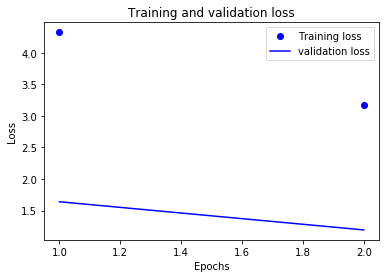

In [62]:
pl.plot_loss(history)

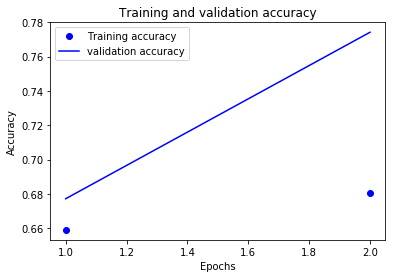

In [84]:
plt.clf()
pl.plot_acc(
    history, 
)

In [85]:
history.history#['acc']

{'acc': [0.6589804490407308, 0.6804484128952026],
 'loss': [3.158297856648763, 2.313175598780314],
 'val_acc': [0.6771519780158997, 0.774169921875],
 'val_loss': [1.0190336108207703, 1.1663833856582642]}

In [87]:
# !tensorboard --logdir=Logs
# http://localhost:6006/

In [152]:
from tensorflow.keras.utils import plot_model

"""
need to create a bash script that sets up
the modeling (creating directories, etc)

can place this in preprocess.sh, but rename the file
"""
plot_model(
    model, 
    show_shapes=True, 
    show_layer_names=True,
    to_file='model.png',
    rankdir='TB'
)

